<a href="https://colab.research.google.com/github/maferrepy/risco-de-credito/blob/main/RiscodeCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [ ]:
df_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
df_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
x_risco_credito= df_risco_credito.iloc[:,0:4].values

In [ ]:
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = df_risco_credito.iloc[:,4].values

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:,0] = label_enconder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_enconder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_enconder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_enconder_renda.fit_transform(x_risco_credito[:,3])

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito,y_risco_credito],f)


In [ ]:
naive_risco_credito = GaussianNB()

In [ ]:
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# HISTORIA BOA = 0
# HISTORIA RUIM = 2
# RENDA MENOR <15 = 0
# GARANTIA = 1
# RENDA>35 = 4
# HISTORIA RUIM = 2
# DIVIDA ALTA = 0

In [ ]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [ ]:
with open('Credit.pkl', 'rb') as f:
  x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(f)

In [ ]:
naive_credit_data = GaussianNB()

In [ ]:
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsao_credit = naive_credit_data.predict(x_credit_teste)

In [ ]:
previsao_credit

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_credit_teste

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
accuracy_score(y_credit_teste, previsao_credit)

0.92

In [ ]:
confusion_matrix(y_credit_teste,previsao_credit)

array([[256,   7],
       [ 17,  20]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.92

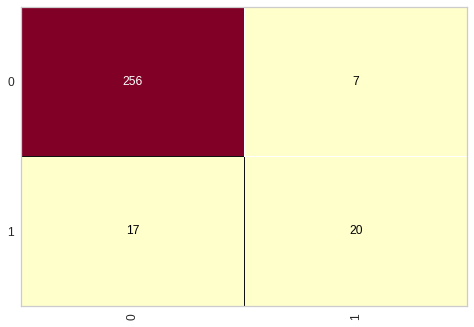

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste,previsao_credit))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       263
           1       0.74      0.54      0.62        37

    accuracy                           0.92       300
   macro avg       0.84      0.76      0.79       300
weighted avg       0.91      0.92      0.91       300



In [ ]:
with open('Census.pkl', 'rb') as f:
  x_censu_treinamento, x_censu_teste, y_censu_treinamento, y_censu_teste = pickle.load(f)

In [ ]:
x_censu_treinamento.shape, y_censu_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_censu_teste.shape, y_censu_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_censu_treinamento, y_censu_treinamento)
previsao_censu = naive_census.predict(x_censu_teste)
previsao_censu

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '>50K'],
      dtype='<U5')

In [ ]:
y_censu_teste

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_censu_teste,previsao_censu)

0.5091095189355169

In [ ]:
#matrix de confusão

0.5091095189355169

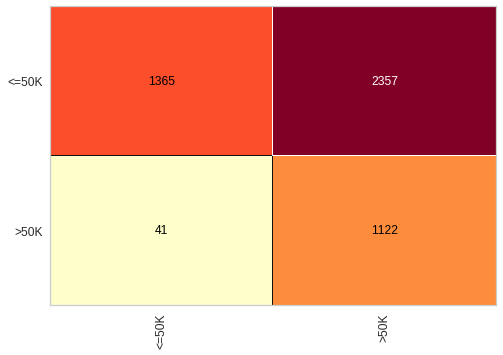

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_censu_treinasmento, y_censu_treinamento)
cm.score(x_censu_teste, y_censu_teste)

In [ ]:
print(classification_report(y_censu_teste, previsao_censu))

              precision    recall  f1-score   support

       <=50K       0.97      0.37      0.53      3722
        >50K       0.32      0.96      0.48      1163

    accuracy                           0.51      4885
   macro avg       0.65      0.67      0.51      4885
weighted avg       0.82      0.51      0.52      4885

